In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Welcome to data cleaning and preprocessing notebook of the the titanic-dataset

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [287]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [288]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [290]:
# check how many datas are missing?

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so it looks like 177 age values ,687 cabin values and 2 embarked values are missing

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [292]:
set(df["Embarked"].values)

{'C', 'Q', 'S', nan}

In [293]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

### Features like passengerid,name and ticket are irrelevant in training a machine learning model so we are going to drop them

In [295]:
dropped = df.drop(["Ticket","Name","PassengerId"],axis=1,inplace=True)

In [296]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [297]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [298]:
cab = set(df["Cabin"].values)

In [299]:
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].mean()

print(f"\nTarget Variable Analysis:")
print(f"Survived: {survival_counts[1]} passengers ({survival_counts[1]/len(df)*100:.1f}%)")
print(f"Did not survive: {survival_counts[0]} passengers ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"Overall survival rate: {survival_rate*100:.1f}%")


Target Variable Analysis:
Survived: 342 passengers (38.4%)
Did not survive: 549 passengers (61.6%)
Overall survival rate: 38.4%


In [300]:
len(cab)

148

In [301]:
set(df["Embarked"].values)

{'C', 'Q', 'S', nan}

In [302]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [303]:
len(df)

891

### lets check what percentage of cabin values are missing?

In [304]:
687/891

0.7710437710437711

## more than 75% of cabin values are missing,so it is better to drop the cabin column

In [305]:
cabin_drop = df.drop(["Cabin"],axis=1,inplace=True)

In [306]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [307]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Missing 

### Now we are going to fill the missing values in age feature and embarked features

In [308]:
# filling the missing values of 

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')  
df['Age'] = imputer.fit_transform(df[['Age']])


In [309]:
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

/tmp/ipykernel_35/1678826357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_embarked, inplace=True)


In [310]:
df.dropna(subset=["Embarked"], inplace=True)


In [311]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [312]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [313]:
set(df["SibSp"].values),set(df["Parch"].values)

({0, 1, 2, 3, 4, 5, 8}, {0, 1, 2, 3, 4, 5, 6})

## Encode Categorical Data

### We are going to encode the categorical data to integers

In [314]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
df['Sex'] = le1.fit_transform(df['Sex'])

In [318]:
sex = {index: label for index, label in enumerate(le1.classes_)}

In [319]:
sex

{0: 'female', 1: 'male'}

In [316]:

le2 = LabelEncoder()
df['Embarked'] = le2.fit_transform(df['Embarked'])

In [317]:
em_dict = {index: label for index, label in enumerate(le2.classes_)}

In [320]:
em_dict

{0: 'C', 1: 'Q', 2: 'S'}

In [321]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Standardize and Normalize the data

### We are going to normalize the data using MinMaxScaler which subtracts the min value from the data and divide by max value of that feature - min value of that feature

In [322]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)



In [323]:
df2 = pd.DataFrame(scaled,columns=df.columns)

In [324]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0


In [325]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### AS YOU CAN SEE in the boxplot,the point above the whiskers (the line from the middle ) or below whiskers are the outliers and the line represents the interquatile range

In [326]:
df2=df.copy()

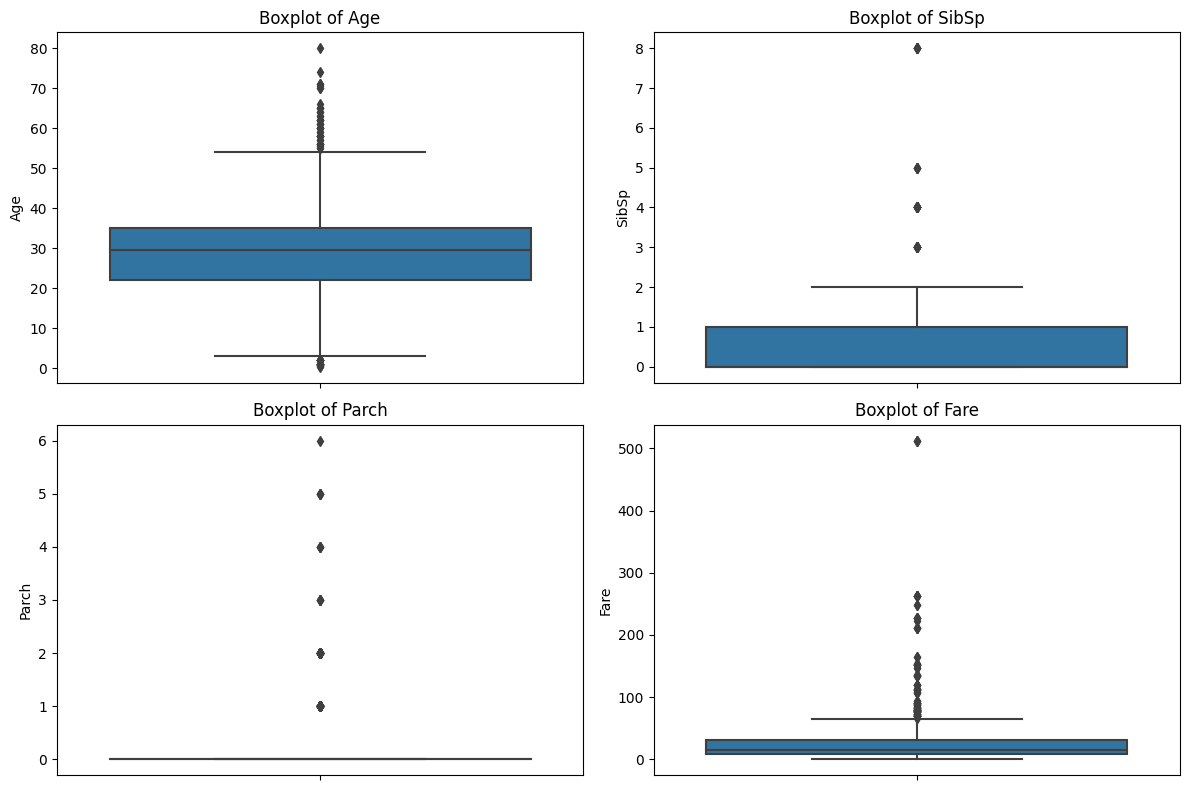

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [328]:
import numpy as np

## Removing The OUTLIERS

### Finally we are removing the outlier,that is those point which lie below or above the interquatile range.
### Basically we are achieveing this by filtering those points which lies inside the interquatile range

In [329]:
numerical_cols = ['Age', 'SibSp', 'Fare']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    


In [330]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1


# Exploratory Data-Analysis

### Summary statistics

In [331]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.339181,2.504386,0.690058,29.005059,0.271930,0.267544,16.317275,1.608187
std,0.473778,0.714816,0.462808,9.440358,0.500982,0.755690,12.611508,0.729020
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.854200,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,10.500000,2.000000
75%,1.000000,3.000000,1.000000,33.000000,0.000000,0.000000,23.062500,2.000000
max,1.000000,3.000000,1.000000,54.000000,2.000000,6.000000,57.000000,2.000000


### Histograms

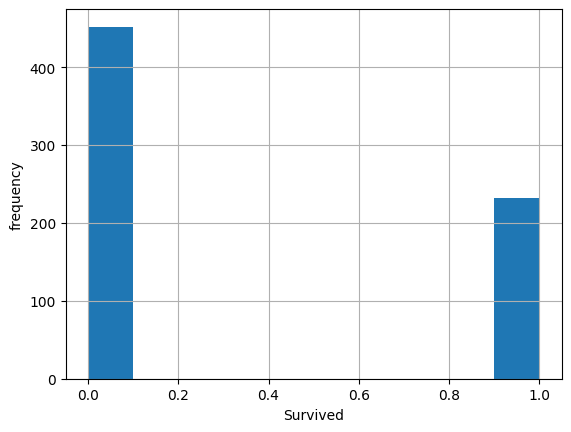

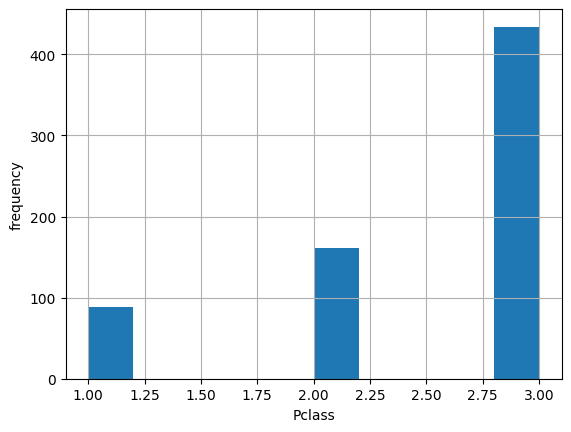

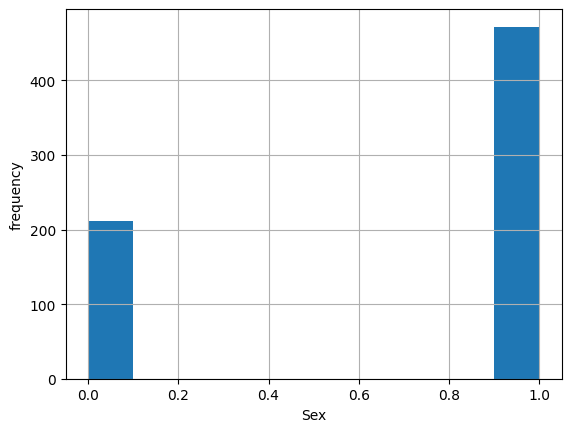

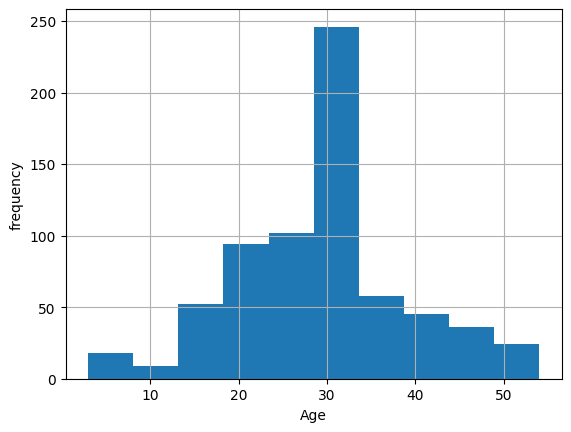

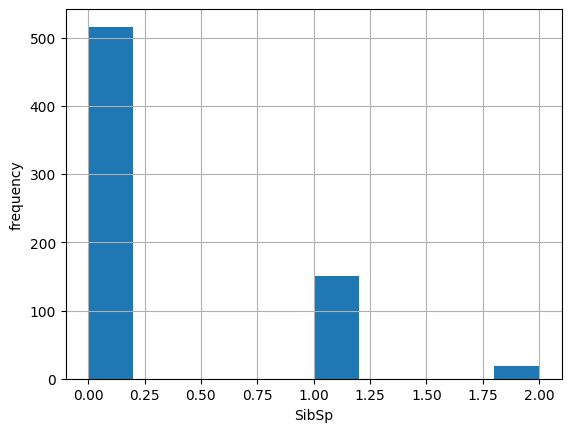

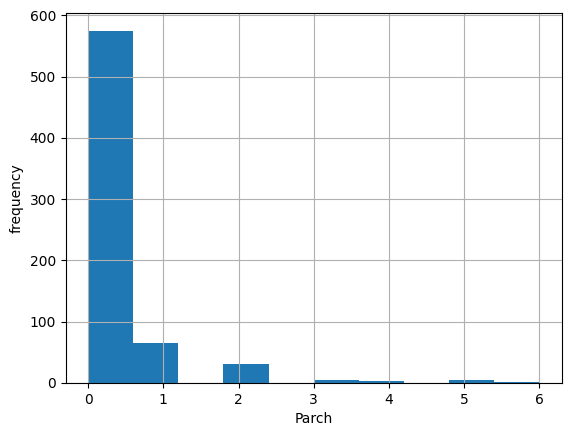

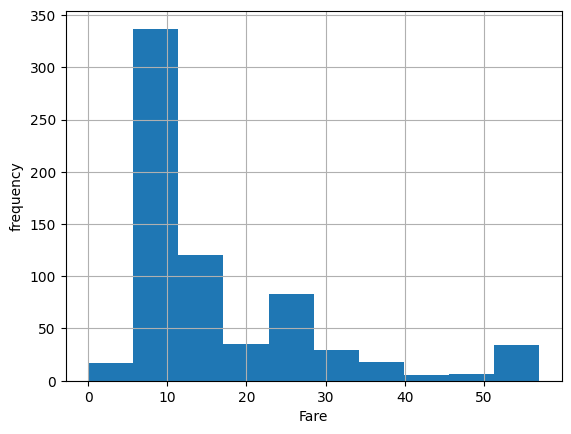

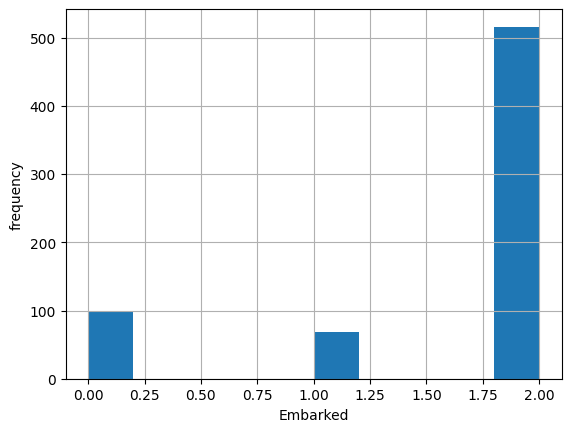

In [332]:
for i in df.columns:
    plt.figure()
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel("frequency")


### Box Plot after removing outliers 

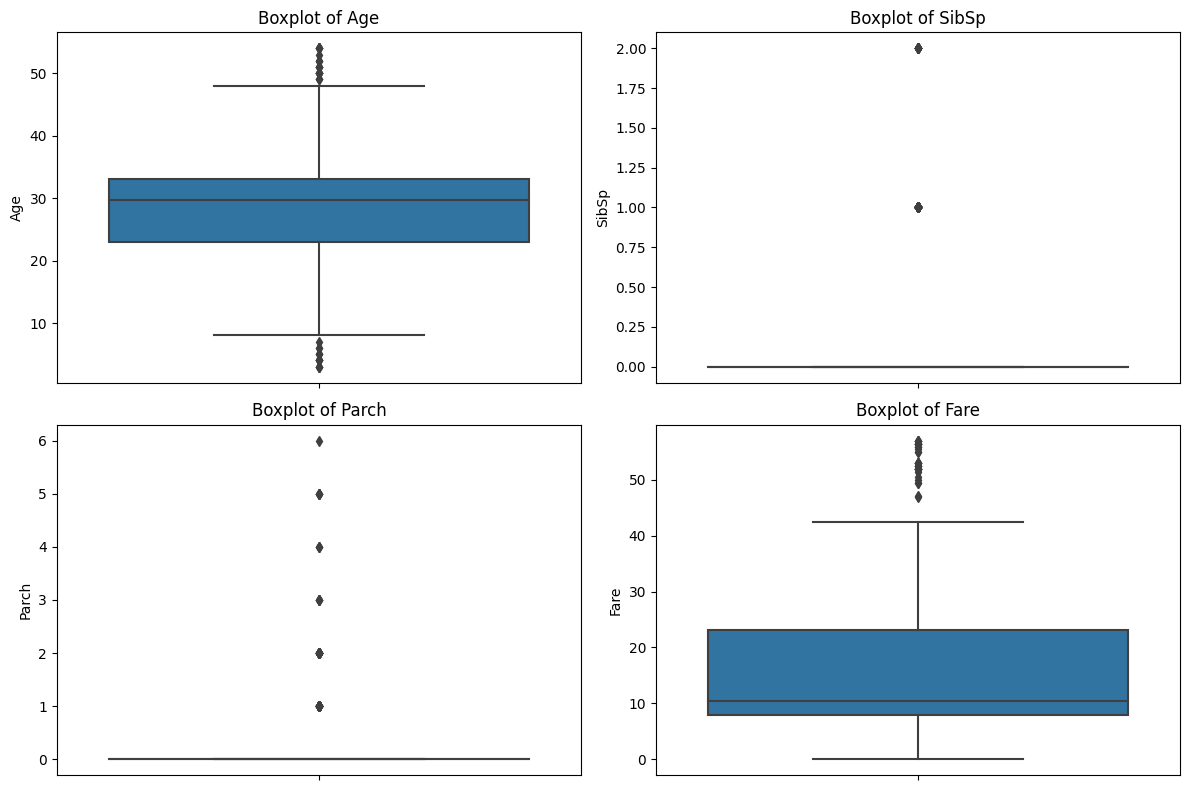

In [333]:
# List of numerical columns to check for outliers
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [334]:
df["Parch"].values

array([0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 4, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Correlation Matrix

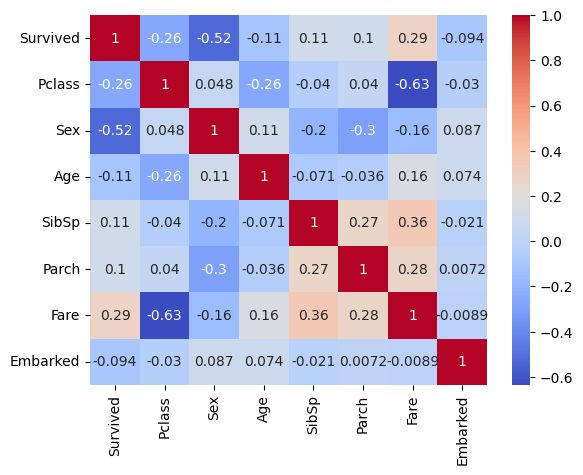

In [335]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

plt.show()

## Description of Features in the Titanic Dataset

The Titanic dataset contains information about passengers aboard the RMS Titanic, including demographic, ticket, and survival details. Here is a description of the most commonly used features:

| Feature    | Description                                                                                  | Example Values / Notes                                 |
|------------|---------------------------------------------------------------------------------------------|--------------------------------------------------------|
| survived   | Survival status (target variable): 0 = No, 1 = Yes                                          | 0, 1                                                   |
| pclass     | Passenger class (proxy for socio-economic status): 1 = 1st, 2 = 2nd, 3 = 3rd                | 1, 2, 3                                                |
| sex        | Sex of the passenger                                                                        | male, female                                           |
| age        | Age of the passenger in years (may include fractional values for infants)                   | 22, 38, 26, etc.                                       |
| sibsp      | Number of siblings/spouses aboard the Titanic                                               | 0, 1, 2, etc.                                          |
| parch      | Number of parents/children aboard the Titanic                                               | 0, 1, 2, etc.                                          |
| ticket     | Ticket number                                                                               | A/5 21171, PC 17599, etc.                              |
| fare       | Passenger fare (in British pounds)                                                          | 7.25, 71.2833, etc.                                    |
| cabin      | Cabin number (may contain missing values)                                                   | C85, NaN, etc.                                         |
| embarked   | Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton                         | C, Q, S                                                |
| name       | Name of the passenger                                                                       | "Braund, Mr. Owen Harris"                              |
| boat       | Lifeboat number (if applicable, may contain missing values)                                 | 2, 11, NaN, etc.                                       |
| home.dest  | Home/destination (sometimes included in extended datasets)                                  | "St Louis, MO", "Montreal, PQ / Chesterville, ON", etc.|
| room       | Room number (sometimes included in extended datasets)                                       | B57 B59 B63 B66, NaN, etc.                             |
| alive      | Was the passenger alive? (derived from 'survived', sometimes included in extended datasets) | yes, no                                                |
| alone      | Was the passenger alone? (derived from 'sibsp' and 'parch')                                | True, False                                            |

**Key Points:**
- The main features for predictive modeling are usually: `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, and `embarked`.
- Some features like `cabin`, `boat`, `home.dest`, `room`, `alive`, and `alone` may appear only in certain versions or extended datasets.
- `embarked` and `age` sometimes contain missing values.


In [336]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

[]

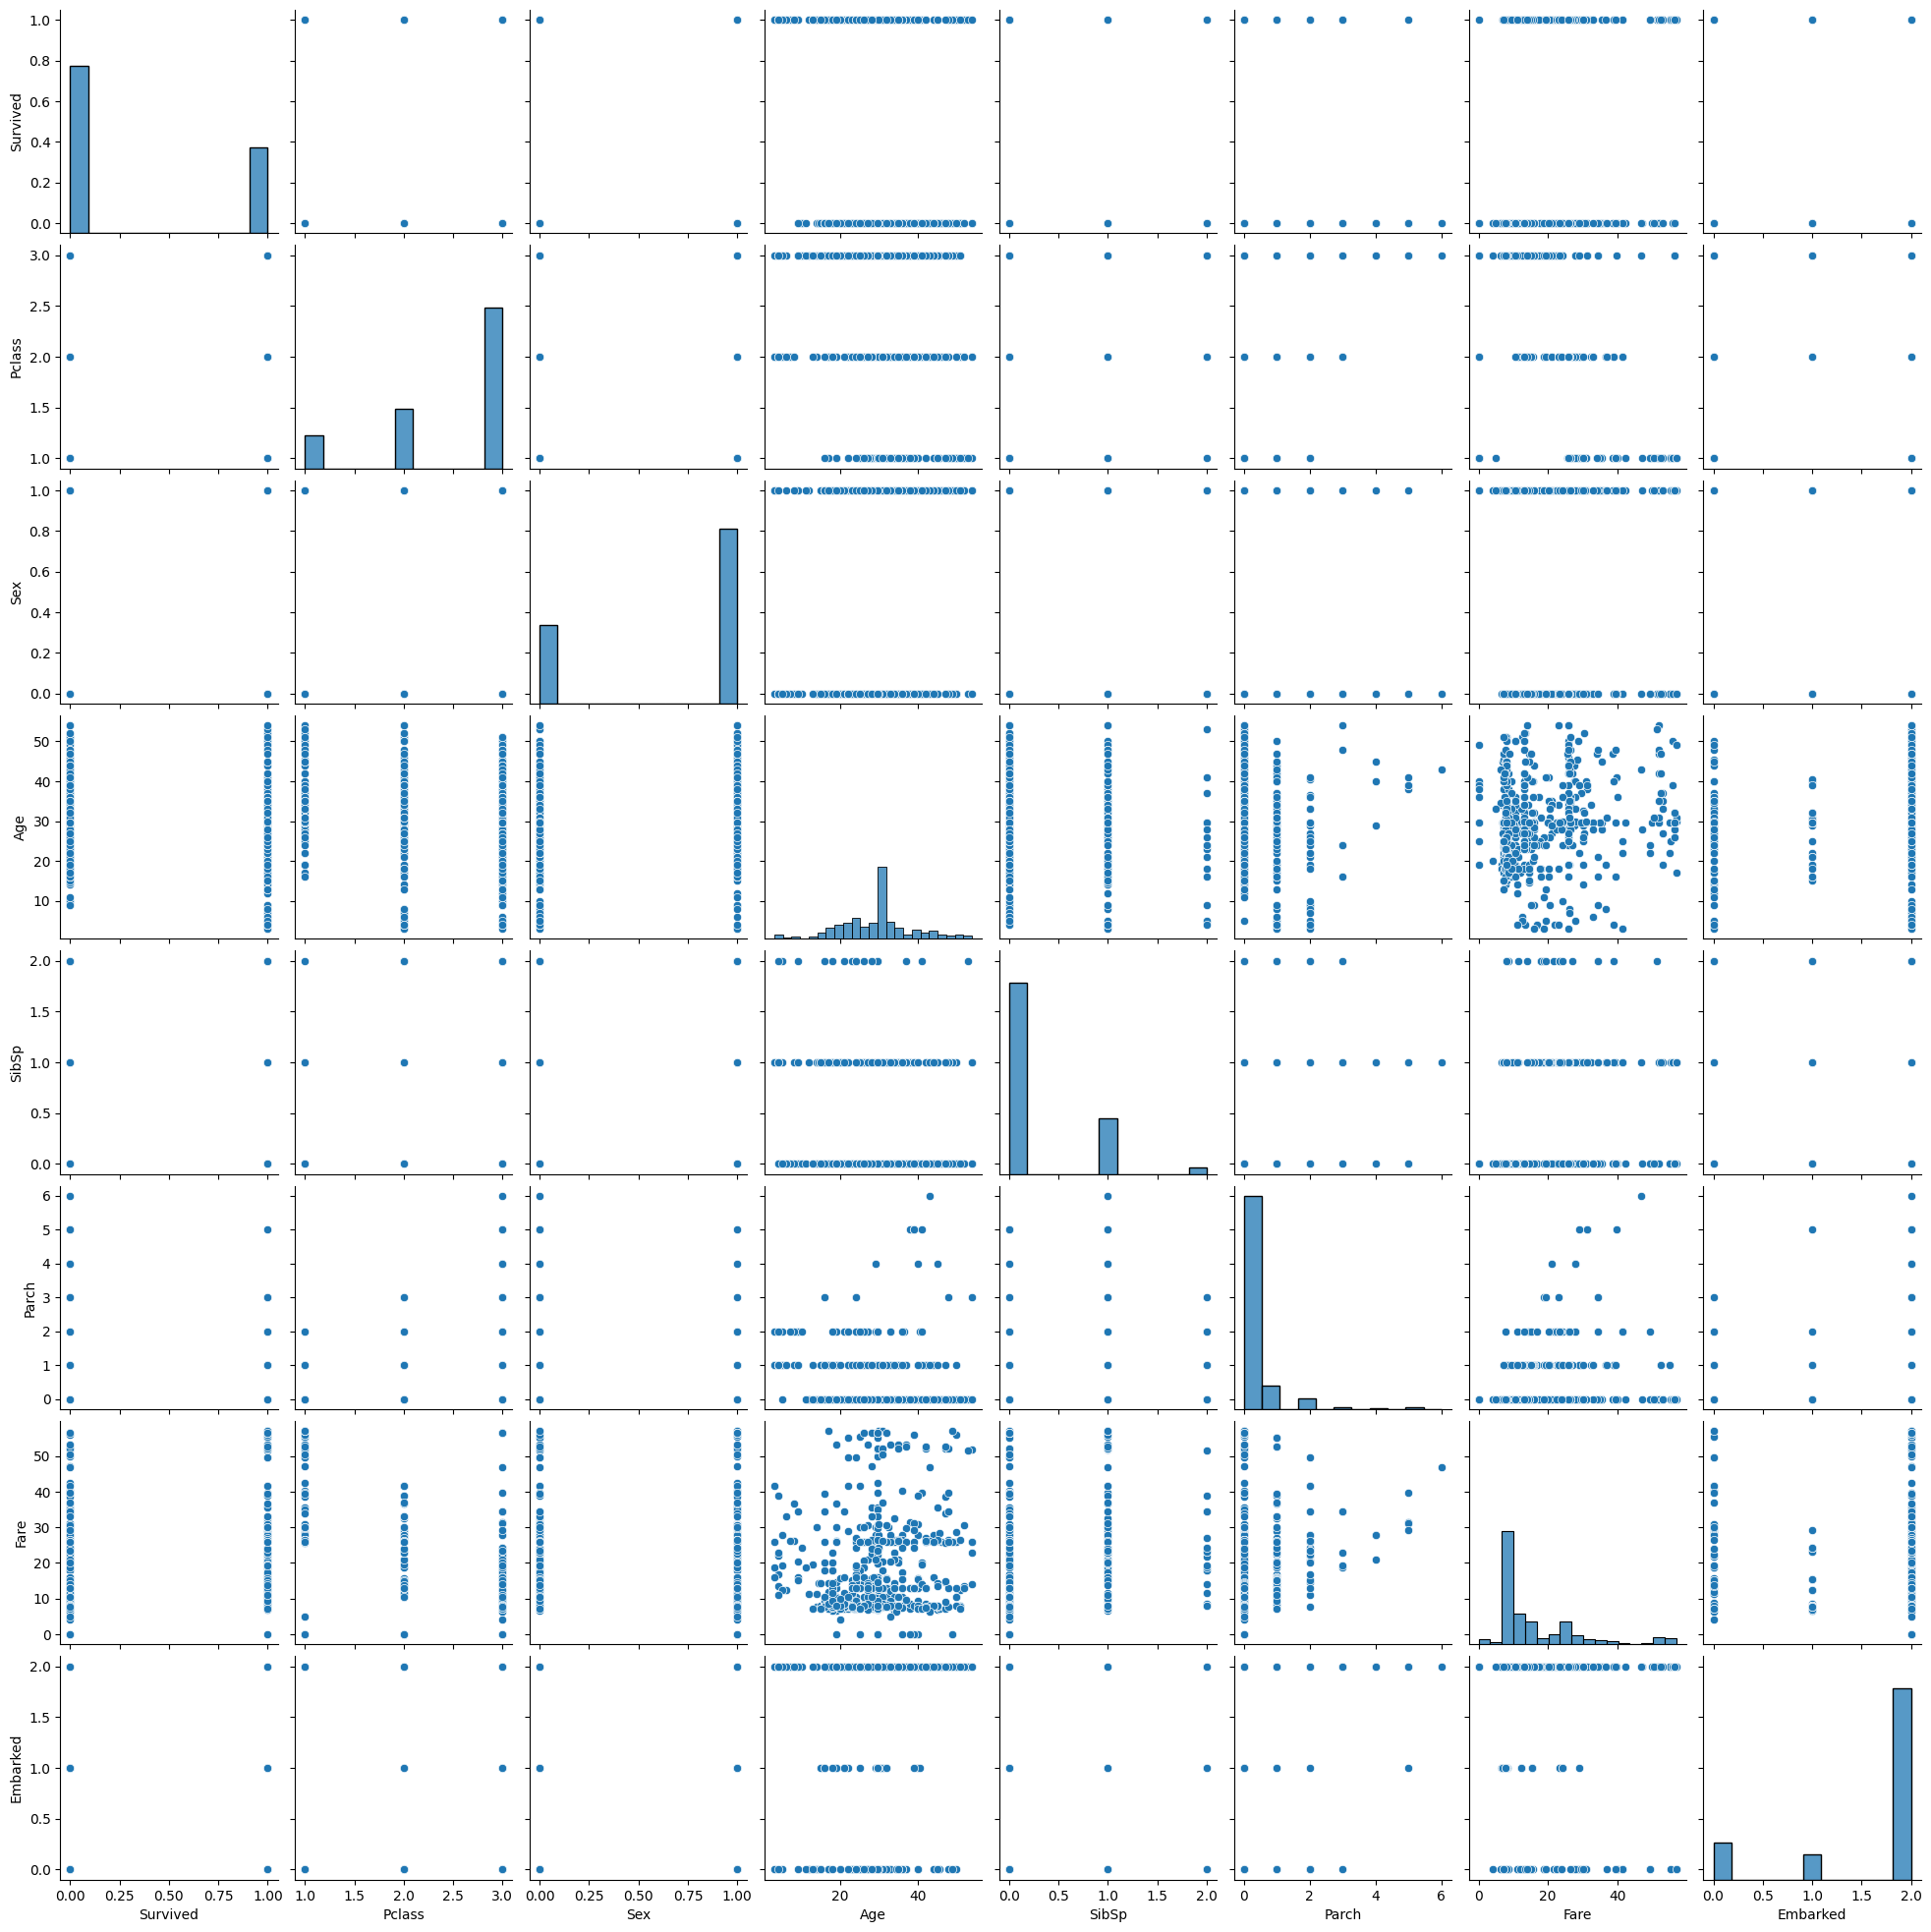

In [337]:
sns.pairplot(df)
plt.plot()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


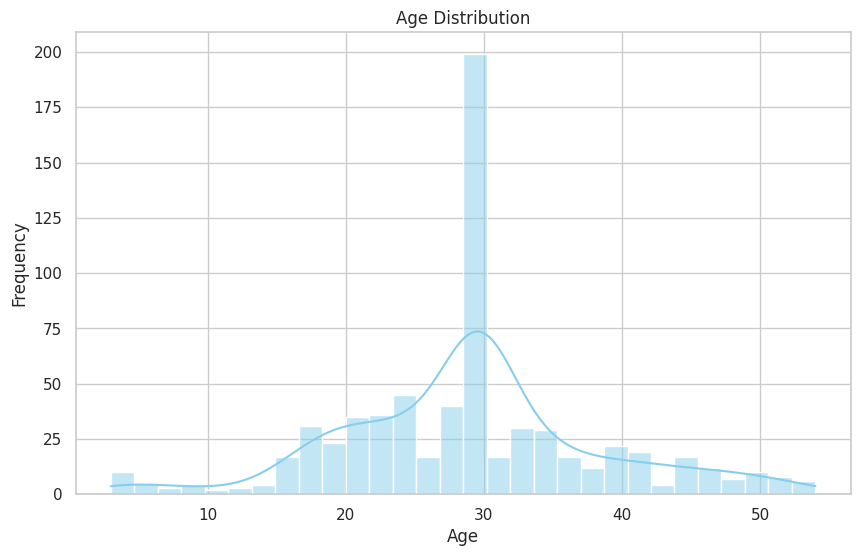

In [391]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



<Axes: xlabel='SibSp'>

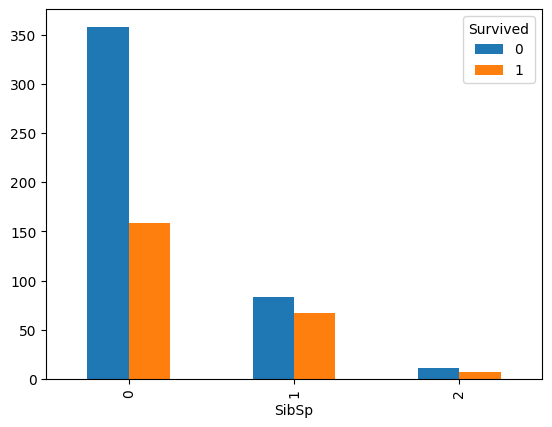

In [338]:
pd.crosstab(df["SibSp"],df["Survived"]).plot.bar()

<Axes: xlabel='Parch'>

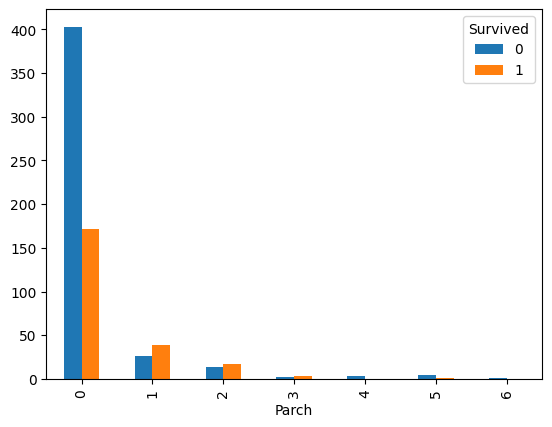

In [339]:
pd.crosstab(df["Parch"],df["Survived"]).plot.bar()

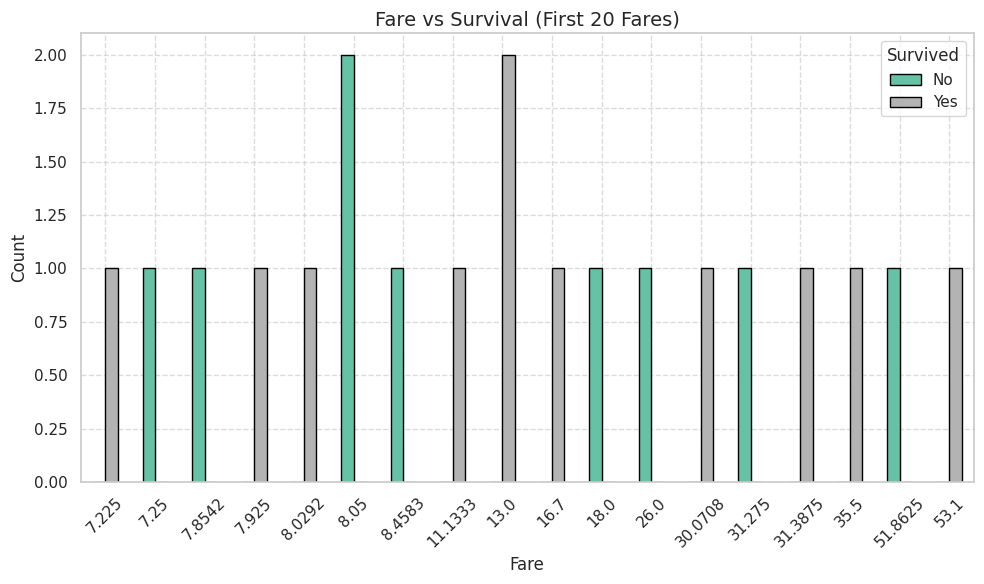

In [371]:
sns.set_theme(style="whitegrid")

# Crosstab and plot
ct = pd.crosstab(df["Fare"][:20], df["Survived"][:50])

# Plot
ax = ct.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')

# Add title and labels
plt.title("Fare vs Survival (First 20 Fares)", fontsize=14)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend and grid
plt.legend(title='Survived', labels=["No", "Yes"])
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

# Tight layout for cleaner spacing
plt.tight_layout()

plt.show()


Text(0, 0.5, 'Survived')

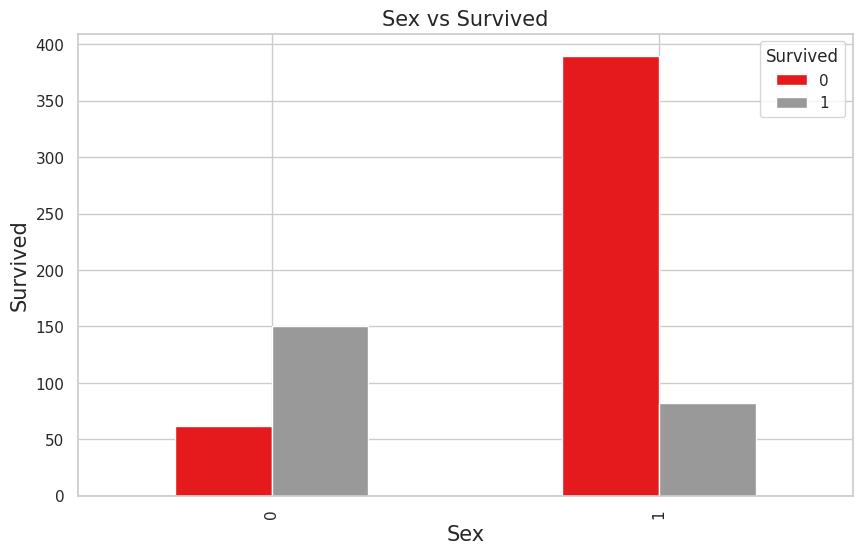

In [377]:
pd.crosstab(df["Sex"],df["Survived"]).plot(kind="bar",figsize=(10,6),colormap="Set1")
plt.title("0 - F , 1- M")
plt.title("Sex vs Survived",fontsize=15)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Survived",fontsize=15)






Text(0, 0.5, 'Survived')

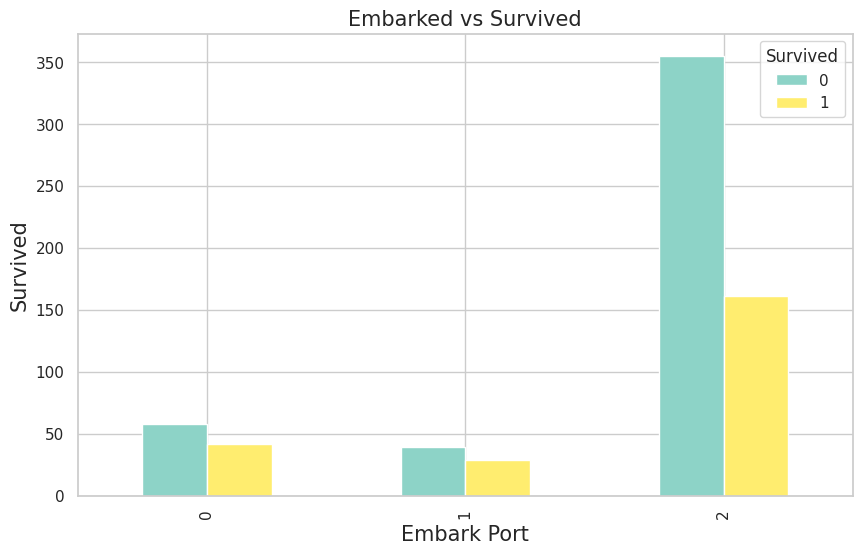

In [380]:

pd.crosstab(df["Embarked"],df["Survived"]).plot(kind="bar",figsize=(10,6),colormap="Set3")

plt.title("Embarked vs Survived",fontsize=15)
plt.xlabel("Embark Port",fontsize=15)
plt.ylabel("Survived",fontsize=15)


In [348]:
print(em_dict)

{0: 'C', 1: 'Q', 2: 'S'}


Text(0, 0.5, 'Survived')

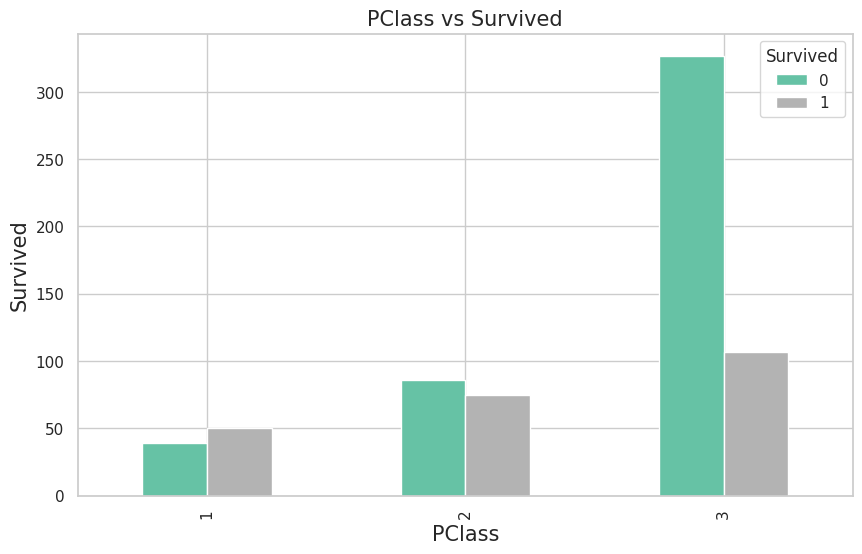

In [383]:

pd.crosstab(df["Pclass"],df["Survived"]).plot(kind="bar",figsize=(10,6),colormap="Set2")

plt.title("PClass vs Survived",fontsize=15)
plt.xlabel("PClass",fontsize=15)
plt.ylabel("Survived",fontsize=15)


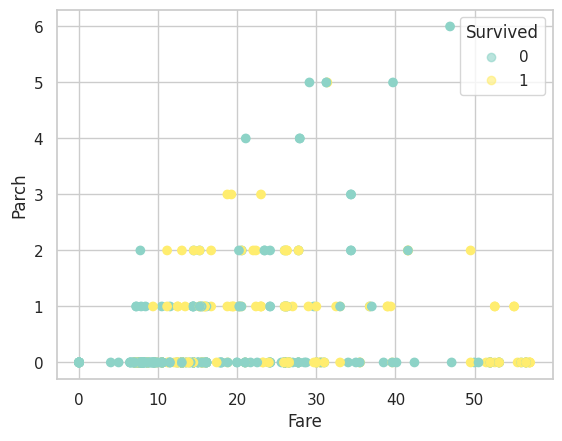

In [386]:

scatter = plt.scatter(df["Fare"],df["Parch"],c=df["Survived"],cmap="Set3")
plt.ylabel("Parch")
plt.xlabel("Fare")

# Add legend for the colors
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, labels, title="Survived")

plt.show()


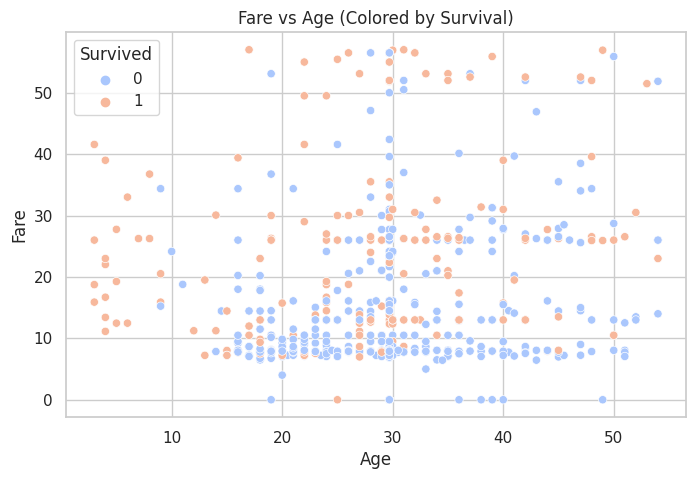

In [369]:

# Set theme for attractive plots
sns.set_theme(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Fare vs Age (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()





# 📊 **Titanic Dataset – Visual Analysis Summary**

The Titanic dataset offers rich insights into passenger demographics and survival outcomes. Based on visual inferences from key features such as **`embarked`**, **`sex`**, **`pclass`**, **`sibsp`**, and **`parch`**, the following trends were observed:

---

### 🛳️ **Port of Embarkation (`embarked`) and Survival**

* The majority of survivors boarded at **Port S (Southampton)**, indexed as `2`, suggesting a higher number of passengers embarked from this location.
* However, Port S also accounted for a significant number of fatalities, indicating that while it had high survival counts, it also had the **largest number of total passengers**, which influenced both survival and mortality rates.

---

### 👨‍👩‍👧 **Gender (`sex`) and Survival**

* **Female passengers** exhibited a significantly **higher survival rate** compared to males.
* This aligns with the "women and children first" protocol followed during the evacuation, resulting in **male passengers experiencing the lowest survival rates** overall.

---

### 🏷️ **Passenger Class (`pclass`) and Survival**

* **1st Class passengers** had the highest survival rates, reflecting **preferential access to lifeboats** and **better cabin locations** closer to deck exits.
* Survival rates declined with socio-economic status, with **3rd Class passengers** facing the most challenges, possibly due to **lower-deck accommodations and restricted access** during the emergency.

---

### 👨‍👩‍👦 **Family Size (`sibsp`, `parch`) and Survival**

* A negative correlation was observed between survival rate and the **number of family members aboard** (siblings/spouses via `sibsp` and parents/children via `parch`).
* Larger family groups likely experienced **delays in decision-making** or **prioritized helping each other**, leading to **lower survival rates** compared to solo travelers or those with fewer dependents.

---

### ✅ **Conclusion**

This analysis highlights how factors such as **gender**, **class**, and **family size** significantly influenced survival probabilities on the Titanic. The patterns underscore the **impact of social structure and evacuation logistics** during maritime disasters.


